In [4]:
import numpy as np

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
print(m)

m_row=[]
for i in range(3):
    r = np.mean(m[i,:])
    m_row.append(r)
    
m_col=[]
for i in range(4):
    c = np.mean(m[:,i])
    m_col.append(c)
    
m_over = np.mean(m)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

o1 = np.outer(u, v)

o2 = np.zeros(16).reshape(4,4)
for i in range(4):
    for j in range(4):
        o2[i, j] = u[i]*v[j]
        
print(o1)
        
o3 = u[:, None] * v[None, :]

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [8]:
ran = np.random.random(60).reshape(10, 6)
print(ran)
ran[np.any(ran<0.1, axis=1)]=0
ran

[[0.45151697 0.0738206  0.31776386 0.95482986 0.37507329 0.91977284]
 [0.96231261 0.74721524 0.70408896 0.52624627 0.04122062 0.68962124]
 [0.99201707 0.12566343 0.81768044 0.78646887 0.03216648 0.18811242]
 [0.6404828  0.2369724  0.64302864 0.08187218 0.38670247 0.90258122]
 [0.68534461 0.94579707 0.98092919 0.26752846 0.66642188 0.68637195]
 [0.00968407 0.99892213 0.5911055  0.32030549 0.39753189 0.30886265]
 [0.01371643 0.81905874 0.27456069 0.21612868 0.37322442 0.8732176 ]
 [0.55408173 0.66551046 0.50822203 0.5645365  0.75114326 0.89507478]
 [0.56757482 0.29413525 0.24619372 0.20661227 0.30337274 0.33982767]
 [0.6518249  0.09519436 0.9672803  0.11809337 0.83235828 0.3444026 ]]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.68534461, 0.94579707, 0.98092919, 0.26752846, 0.66642188,
        0.68637195],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.55408173, 0.66551046, 0.50822203, 0.5645365 , 0.75114326,
        0.89507478],
       [0.56757482, 0.29413525, 0.24619372, 0.20661227, 0.30337274,
        0.33982767],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]


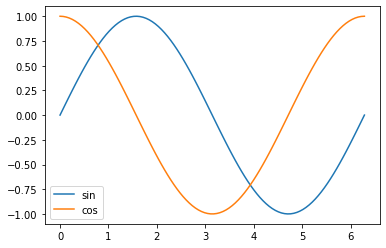

In [13]:
x = np.linspace(0, 2*np.pi, 100)
print(x[::10])
x[::-1]
x[np.fabs(np.sin(x)-np.cos(x)) < 0.1]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.legend()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
a = range(1, 11)
matrix = np.outer(a,a)
diag = np.diag(matrix)
trace = sum(diag)
anti_diag = np.fliplr(matrix).diagonal()
diag_1 = np.diag(matrix[1:])
diag_1

385

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [14]:
x = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
grid = x - x[:, None] 
grid_km = grid * 1.6
print(grid_km)

[[    0.    316.8   484.8  1177.6  1393.6  1880.   2360.   2470.4  3060.8
   3916.8]
 [ -316.8     0.    168.    860.8  1076.8  1563.2  2043.2  2153.6  2744.
   3600. ]
 [ -484.8  -168.      0.    692.8   908.8  1395.2  1875.2  1985.6  2576.
   3432. ]
 [-1177.6  -860.8  -692.8     0.    216.    702.4  1182.4  1292.8  1883.2
   2739.2]
 [-1393.6 -1076.8  -908.8  -216.      0.    486.4   966.4  1076.8  1667.2
   2523.2]
 [-1880.  -1563.2 -1395.2  -702.4  -486.4     0.    480.    590.4  1180.8
   2036.8]
 [-2360.  -2043.2 -1875.2 -1182.4  -966.4  -480.      0.    110.4   700.8
   1556.8]
 [-2470.4 -2153.6 -1985.6 -1292.8 -1076.8  -590.4  -110.4     0.    590.4
   1446.4]
 [-3060.8 -2744.  -2576.  -1883.2 -1667.2 -1180.8  -700.8  -590.4     0.
    856. ]
 [-3916.8 -3600.  -3432.  -2739.2 -2523.2 -2036.8 -1556.8 -1446.4  -856.
      0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
import math

x = np.arange(100)

def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))

foo = np.vectorize(is_prime)
foo(x)
x[foo(x)]

%timeit x[foo(x)]


array([ 0,  1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47,
       53, 59, 61, 67, 71, 73, 79, 83, 89, 97])

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

-2.57

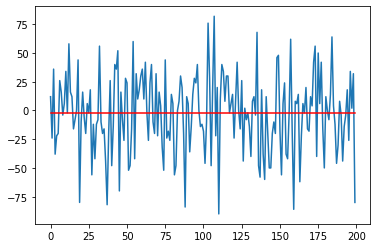

In [13]:
import numpy.random as npr
npr.seed(123)

x = npr.randint(-1,1,size=(1000,200))
x[x==0] = 1
dist = x.sum(axis=1)
square = dist**2
np.mean(square)

step = x.sum(axis=0)
m = np.mean(step)

import matplotlib.pyplot as plt
%matplotlib inline

y = np.arange(200)
plt.plot(y, step)
plt.plot(y, 0*y+m, 'r')

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [138]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-10-27 16:08:34--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2020-10-27 16:08:34--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc64852668aa1f2eec1209bdea9c.dl.dropboxusercontent.com/cd/0/inline/BCHs-oyhCQZPK3aqnSght4cBuWFayLsEkC8aHiGrldN_vtI_0ulGsE8Vg9fbPqM_4iL8jZWBcaQ2JC-Jk6ijwweMeqFFkb4rPXZ1_C3vq85alg/file# [segue]
--2020-10-27 16:08:35--  https://uc64852668aa1f2eec1209bdea9c.dl.dropboxusercontent.com/cd/0/inline/BCHs-oyhCQZPK3aqnSght4cBuWFayLsEkC8aHiGrldN_vtI_0ulGsE8Vg9fbPqM_4iL8jZWBcaQ2JC-Jk6ijwweMeqFFkb4rP

In [140]:
! cat populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


array([[1.        , 0.07189206],
       [0.07189206, 1.        ]])

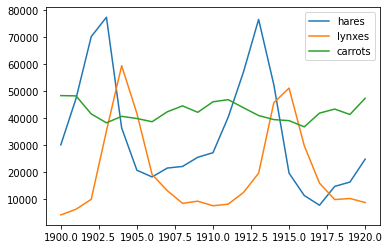

In [158]:
data = np.loadtxt('populations.txt',skiprows=1)
year = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

plt.plot(year, hares, label='hares')
plt.plot(year, lynxes, label='lynxes')
plt.plot(year, carrots, label='carrots')
plt.legend()

m_hares = np.mean(hares)
m_lynx = np.mean(lynxes)
m_carr = np.mean(carrots)

s_hares = np.std(hares)
s_lynx = np.std(lynxes)
s_carr = np.std(carrots)

corr_har_lyn = np.corrcoef(hares, lynxes)
corr_har_lyn

In [175]:
label = np.array(['year', 'hares', 'lynxes', 'carrots'])
big_species = label[np.argmax(data, axis=1)]
highpop = np.column_stack((year, big_species))
highpop

array([['1900.0', 'carrots'],
       ['1901.0', 'carrots'],
       ['1902.0', 'hares'],
       ['1903.0', 'hares'],
       ['1904.0', 'lynxes'],
       ['1905.0', 'lynxes'],
       ['1906.0', 'carrots'],
       ['1907.0', 'carrots'],
       ['1908.0', 'carrots'],
       ['1909.0', 'carrots'],
       ['1910.0', 'carrots'],
       ['1911.0', 'carrots'],
       ['1912.0', 'hares'],
       ['1913.0', 'hares'],
       ['1914.0', 'hares'],
       ['1915.0', 'lynxes'],
       ['1916.0', 'carrots'],
       ['1917.0', 'carrots'],
       ['1918.0', 'carrots'],
       ['1919.0', 'carrots'],
       ['1920.0', 'carrots']], dtype='<U32')